<a href="https://colab.research.google.com/github/Shrawanthi06/ML_Projects/blob/main/Case_study_cancer_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving expression_file (1).csv to expression_file (1).csv


In [5]:
df=pd.read_csv('expression_file (1).csv')

In [8]:
df['label'] = df['condition'].map({'tumor': 1, 'normal': 0})
print(f'Number of NaN values in the dataset: {df.isna().sum().sum()}')
X = df['expression'].values.reshape(-1, 1)
y = df['label']


Number of NaN values in the dataset: 0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.5833333333333334
Precision: 0.6
Recall: 0.5
F1 Score: 0.5454545454545454


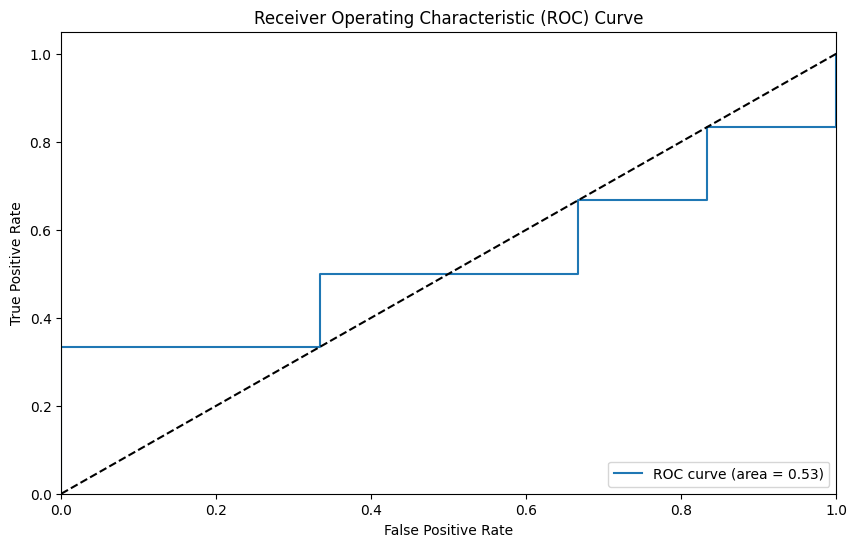

In [11]:
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


/tmp/ipython-input-2524078350.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['label'] == 1]['expression'], label='Tumor', shade=True)
/tmp/ipython-input-2524078350.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['label'] == 0]['expression'], label='Normal', shade=True)


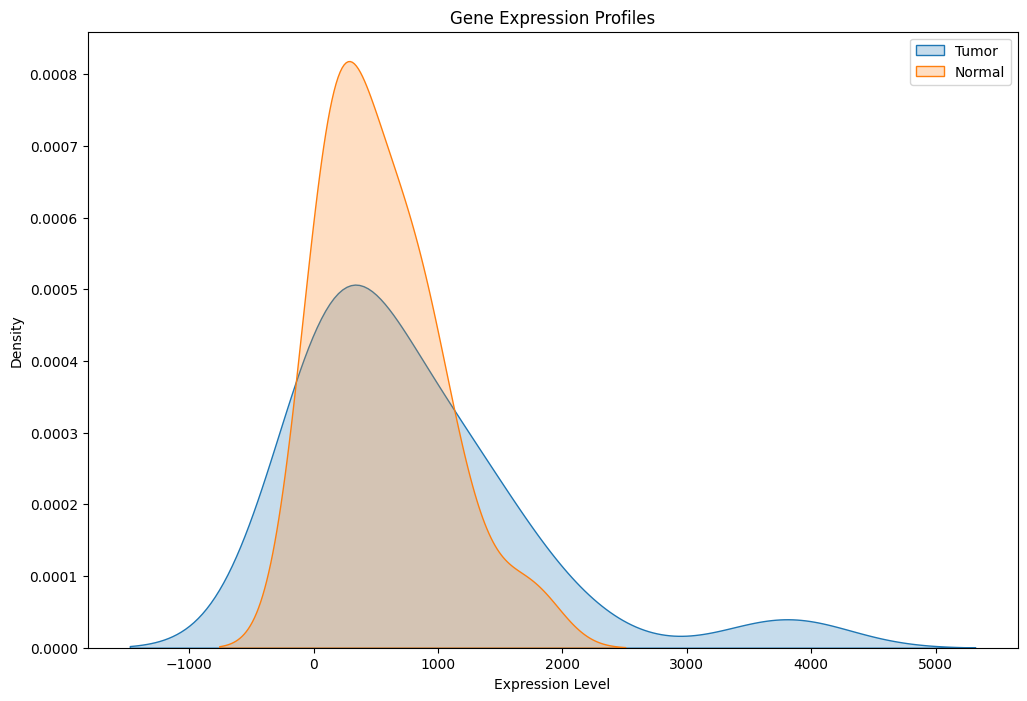

In [13]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df[df['label'] == 1]['expression'], label='Tumor', shade=True)
sns.kdeplot(df[df['label'] == 0]['expression'], label='Normal', shade=True)
plt.xlabel('Expression Level')
plt.ylabel('Density')
plt.title('Gene Expression Profiles')
plt.legend()
plt.show()